In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/FinancialAnalyticscleaned.csv")

In [3]:
df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'], dtype='object')

In [4]:
df.shape

(488, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

S.No.                 0
Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    29
dtype: int64

In [8]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

S.No.                0.000000
Name                 0.000000
Mar Cap - Crore      1.844262
Sales Qtr - Crore    5.942623
dtype: float64


In [12]:
#Handle missing values
df['Sales Qtr - Crore'].fillna(df['Sales Qtr - Crore'].mean(),inplace=True)

In [13]:
df['Mar Cap - Crore'].fillna(df['Mar Cap - Crore'].mean(),inplace=True)

In [14]:
df.isnull().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [15]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,488.000000,488.000000
mean,251.508197,28043.857119,3807.789412
std,145.884078,58912.585788,9687.458059
min,1.000000,3017.070000,0.000000
25%,122.750000,4879.612500,570.035000
50%,252.500000,10380.425000,1276.255000
75%,378.250000,25502.085000,3753.280000
max,500.000000,583436.720000,110666.930000


In [16]:
df['MarCap_to_Sales'] = df['Mar Cap - Crore'] / df['Sales Qtr - Crore']

In [17]:
bins = [0, 1000, 5000, 10000, np.inf]
labels = ['Small Cap', 'Mid Cap', 'Large Cap', 'Mega Cap']
df['MarCap_Category'] = pd.cut(df['Mar Cap - Crore'], bins=bins, labels=labels)

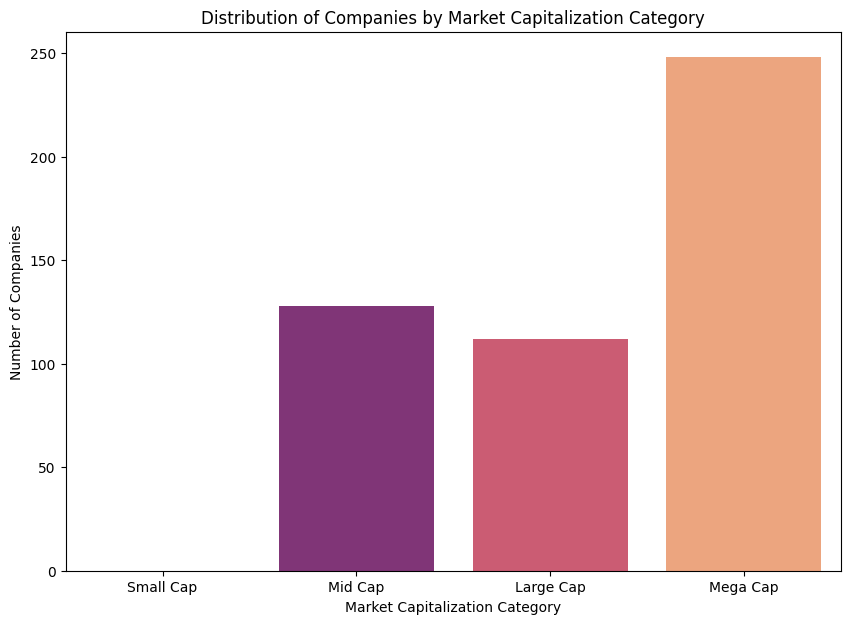

In [21]:
plt.figure(figsize=(10, 7))
sns.countplot(x='MarCap_Category', data=df, palette='magma')
plt.title('Distribution of Companies by Market Capitalization Category')
plt.xlabel('Market Capitalization Category')
plt.ylabel('Number of Companies')
plt.show()

Box Plot of Sales per Market Capitalization Category

A box plot can help you understand the distribution of sales within each market capitalization category.

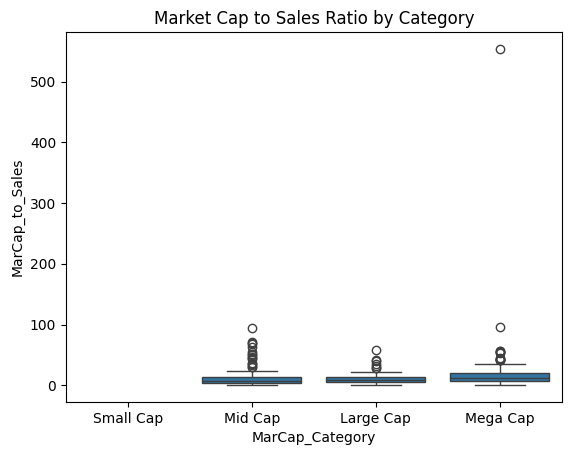

In [22]:
sns.boxplot(x='MarCap_Category', y='MarCap_to_Sales', data=df)
plt.title('Market Cap to Sales Ratio by Category')
plt.show()

<Axes: xlabel='Mar Cap - Crore'>

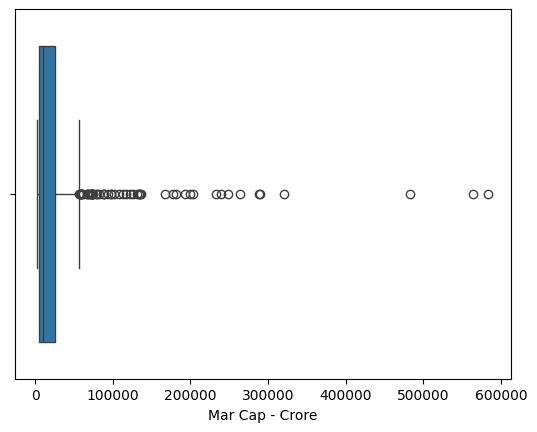

In [49]:
sns.boxplot(x='Mar Cap - Crore',data=df)

<Axes: xlabel='Sales Qtr - Crore'>

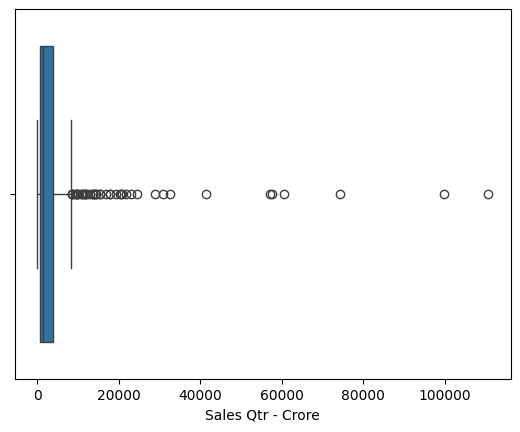

In [48]:
sns.boxplot(x='Sales Qtr - Crore',data=df)

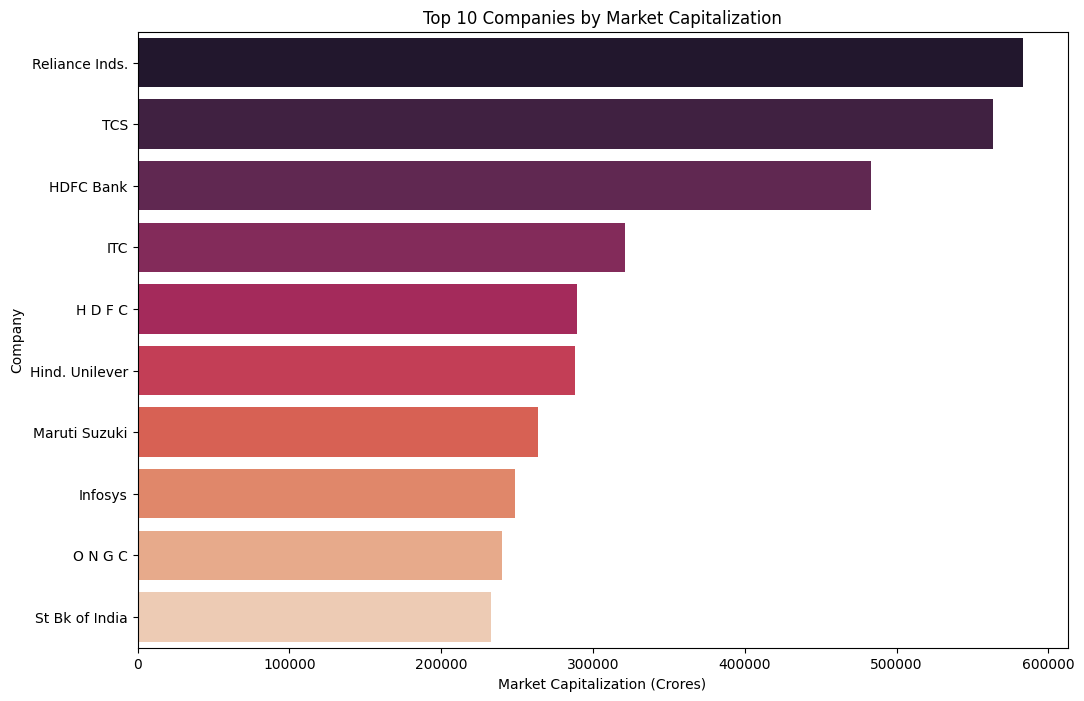

In [64]:
# Top 10 companies by Market Capitalization
top_10_market_cap = df.nlargest(10, 'Mar Cap - Crore')

plt.figure(figsize=(12, 8))
sns.barplot(x= 'Mar Cap - Crore', y='Name', data=top_10_market_cap, palette='rocket')
plt.title('Top 10 Companies by Market Capitalization')
plt.xlabel('Market Capitalization (Crores)')
plt.ylabel('Company')
plt.show()

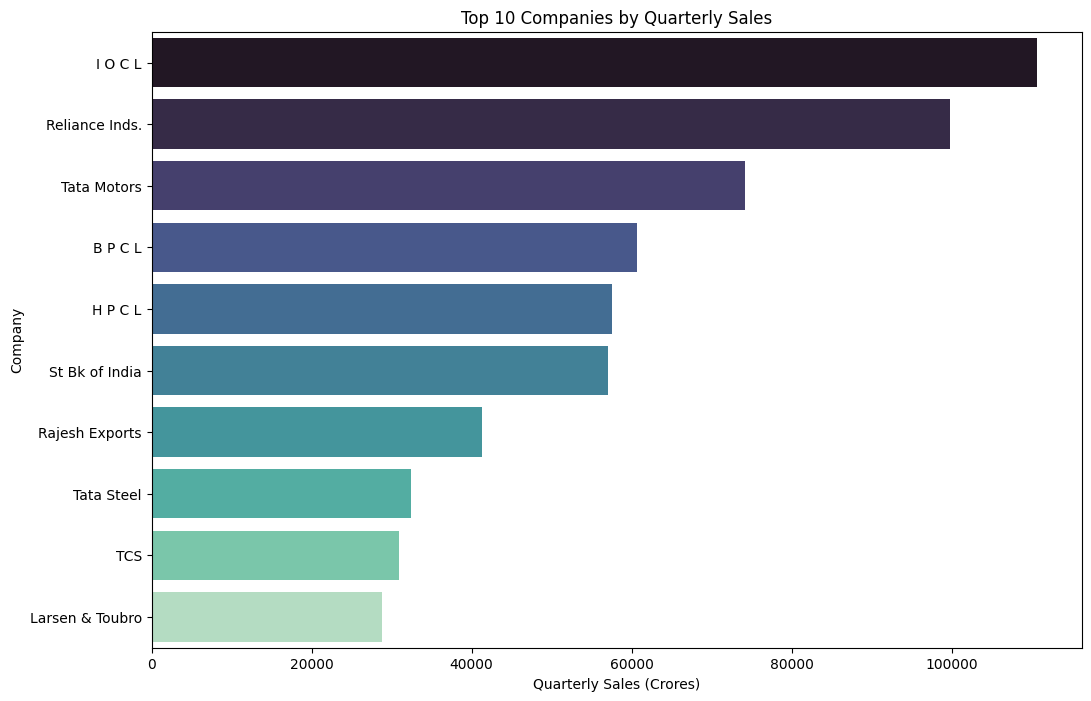

In [61]:
# Top 10 companies by Quarterly Sales
top_10_sales_qtr = df.nlargest(10, 'Sales Qtr - Crore')

plt.figure(figsize=(12, 8))
sns.barplot(x= 'Sales Qtr - Crore', y='Name', data=top_10_sales_qtr, palette='mako')
plt.title('Top 10 Companies by Quarterly Sales')
plt.xlabel('Quarterly Sales (Crores)')
plt.ylabel('Company')
plt.show()

### Histograms and Distribution Analysis

With log transformation:

Normalization: Log transformation can help normalize the data, making it more symmetric and easier to analyze.

Scale Reduction: It reduces the impact of extreme values, bringing the data into a more manageable range and revealing underlying patterns.

In [23]:
df['Log_MarCap'] = np.log(df['Mar Cap - Crore'])
df['Log_Sales'] = np.log(df['Sales Qtr - Crore'])

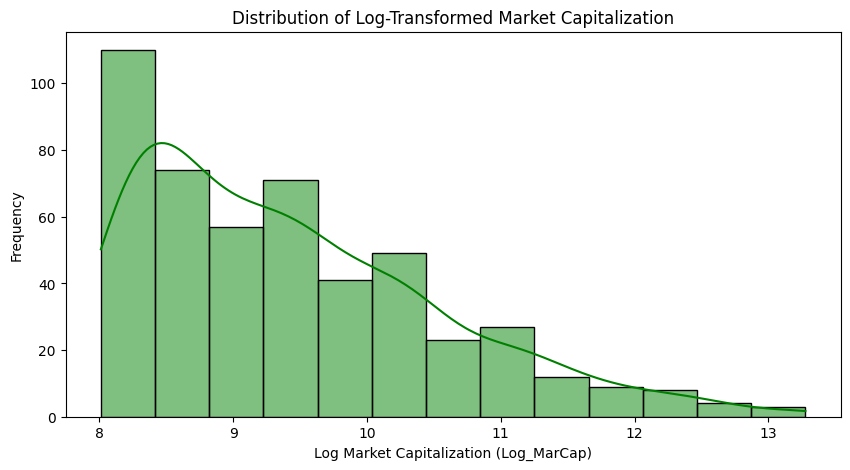

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Log_MarCap'], kde=True, color='green')
plt.title('Distribution of Log-Transformed Market Capitalization')
plt.xlabel('Log Market Capitalization (Log_MarCap)')
plt.ylabel('Frequency')
plt.show()

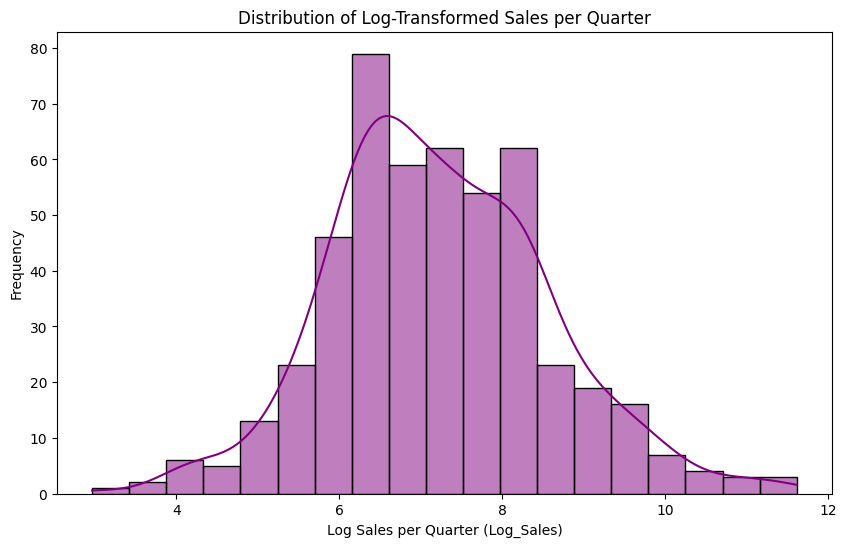

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Sales'], kde=True, color='purple')
plt.title('Distribution of Log-Transformed Sales per Quarter')
plt.xlabel('Log Sales per Quarter (Log_Sales)')
plt.ylabel('Frequency')
plt.show()

Without log transformation:

Skewness: The data might remain highly skewed, leading to histograms that are heavily concentrated in one area, making it hard to interpret the distribution.

Outliers: Extreme values (outliers) can dominate the plot, overshadowing the rest of the data and making it difficult to see the overall pattern.

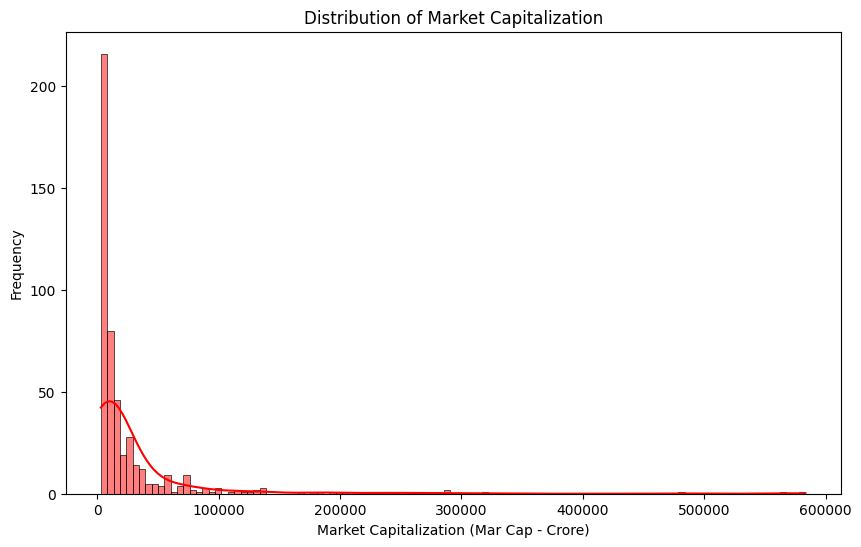

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mar Cap - Crore'], kde=True, color='red')
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Mar Cap - Crore)')
plt.ylabel('Frequency')
plt.show()

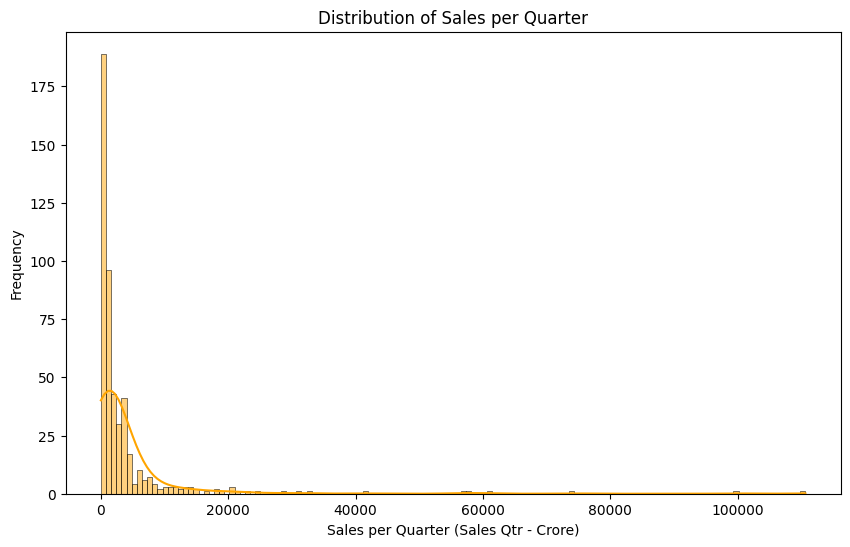

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Qtr - Crore'], kde=True, color='orange')
plt.title('Distribution of Sales per Quarter')
plt.xlabel('Sales per Quarter (Sales Qtr - Crore)')
plt.ylabel('Frequency')
plt.show()

S.No.  Name            Mar Cap - Crore  Sales Qtr - Crore  MarCap_to_Sales  MarCap_Category  Log_MarCap  Log_Sales  Sales_Performance
1      Reliance Inds.  583436.72        99810.00           5.845474         Mega Cap         13.276691   11.511024  Good                 1
15     I O C L         178017.48        110666.93          1.608588         Mega Cap         12.089637   11.614280  Good                 1
24     Tata Motors     117071.87        74156.07           1.578723         Mega Cap         11.670543   11.213927  Good                 1
28     B P C L         98278.00         60616.36           1.621311         Mega Cap         11.495555   11.012320  Good                 1
55     H P C L         58034.78         57474.25           1.009753         Mega Cap         10.968798   10.959092  Good                 1
Name: count, dtype: int64


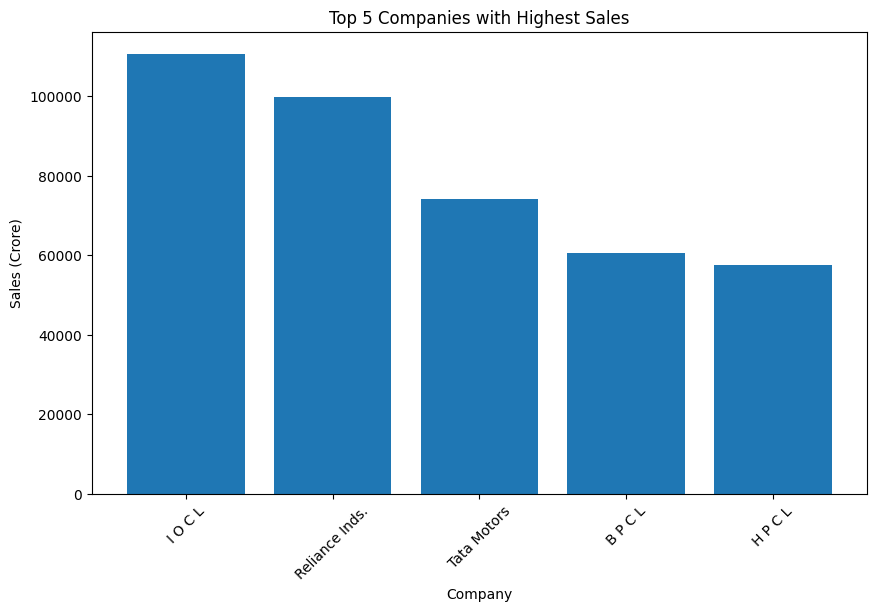

In [59]:
# Sort the dataset by sales in descending order
sorted_data = df.sort_values('Sales Qtr - Crore', ascending=False)

# Select the top 5 companies with the highest sales
top_5_companies_sales = sorted_data.head(5)

print(top_5_companies_sales.value_counts())
# Plot the sales of the top 5 companies
plt.figure(figsize=(10, 6))
plt.bar(top_5_companies_sales['Name'], top_5_companies_sales['Sales Qtr - Crore'])
plt.title('Top 5 Companies with Highest Sales')
plt.xlabel('Company')
plt.ylabel('Sales (Crore)')
plt.xticks(rotation=45)
plt.show()

S.No.  Name            Mar Cap - Crore  Sales Qtr - Crore  MarCap_to_Sales  MarCap_Category  Log_MarCap  Log_Sales
1      Reliance Inds.  583436.72        99810.00           5.845474         Mega Cap         13.276691   11.511024    1
15     I O C L         178017.48        110666.93          1.608588         Mega Cap         12.089637   11.614280    1
24     Tata Motors     117071.87        74156.07           1.578723         Mega Cap         11.670543   11.213927    1
28     B P C L         98278.00         60616.36           1.621311         Mega Cap         11.495555   11.012320    1
55     H P C L         58034.78         57474.25           1.009753         Mega Cap         10.968798   10.959092    1
Name: count, dtype: int64


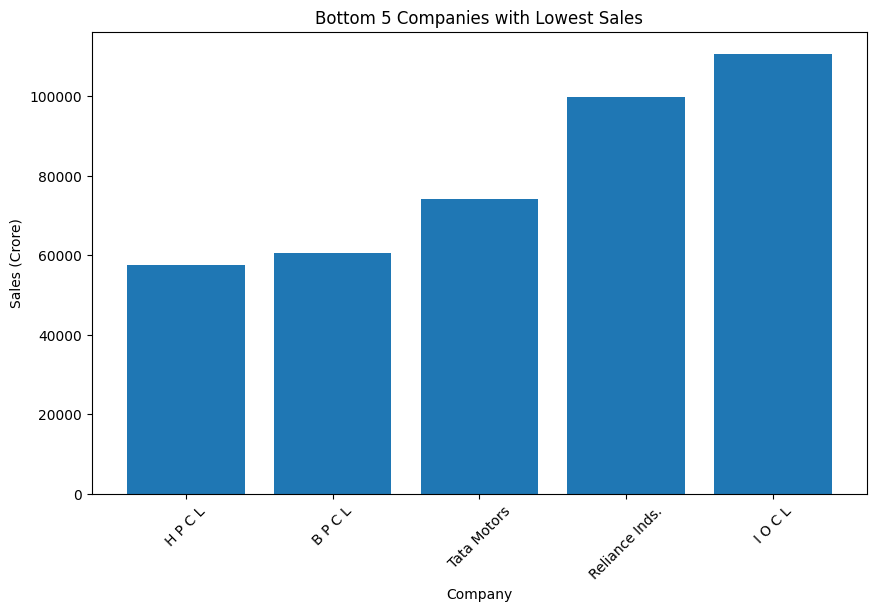

In [41]:
# Sort the dataset by sales in ascending order
sorted_data = df.sort_values('Sales Qtr - Crore')

# Select the bottom 5 companies with the highest sales
bottom_5_companies_sales = sorted_data.tail(5)
print(bottom_5_companies_sales.value_counts())
# Plot the sales of the bottom 5 companies
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_companies_sales['Name'], bottom_5_companies_sales['Sales Qtr - Crore'])
plt.title('Bottom 5 Companies with Lowest Sales')
plt.xlabel('Company')
plt.ylabel('Sales (Crore)')
plt.xticks(rotation=45)
plt.show()

S.No.  Name            Mar Cap - Crore  Sales Qtr - Crore  MarCap_to_Sales  MarCap_Category  Log_MarCap  Log_Sales
1      Reliance Inds.  583436.72        99810.00           5.845474         Mega Cap         13.276691   11.511024    1
2      TCS             563709.84        30904.00           18.240676        Mega Cap         13.242295   10.338641    1
3      HDFC Bank       482953.59        20581.27           23.465685        Mega Cap         13.087676   9.932137     1
4      ITC             320985.27        9772.02            32.847382        Mega Cap         12.679151   9.187278     1
5      H D F C         289497.37        16840.51           17.190535        Mega Cap         12.575901   9.731543     1
Name: count, dtype: int64


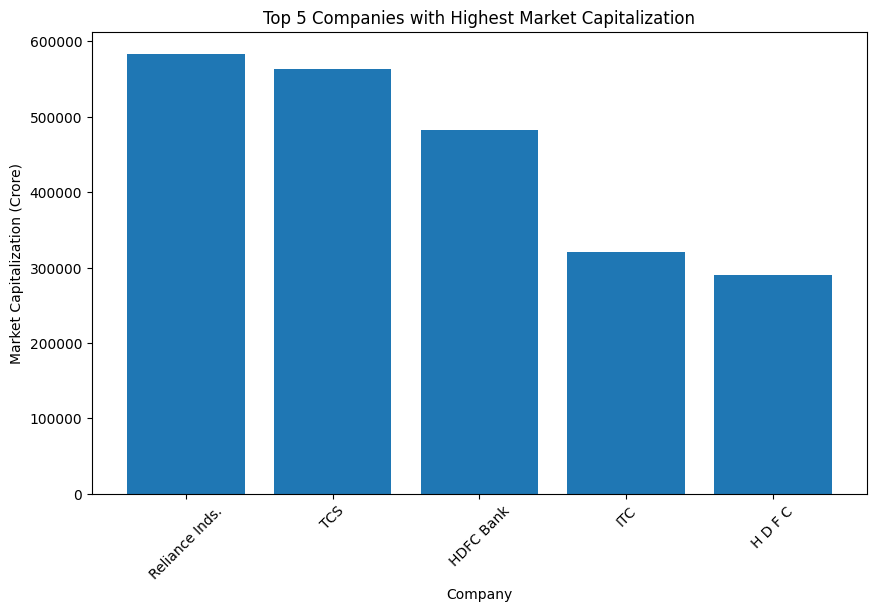

In [44]:
# Sort the dataset by market capitalization in descending order
sorted_data = df.sort_values('Mar Cap - Crore', ascending=False)

# Select the top 5 companies with the highest market capitalization
top_5_companies = sorted_data.head(5)


print(top_5_companies.value_counts())
# Plot the market capitalization of the top 5 companies
plt.figure(figsize=(10, 6))
plt.bar(top_5_companies['Name'], top_5_companies['Mar Cap - Crore'])
plt.title('Top 5 Companies with Highest Market Capitalization')
plt.xlabel('Company')
plt.ylabel('Market Capitalization (Crore)')
plt.xticks(rotation=45)
plt.show()

S.No.  Name             Mar Cap - Crore  Sales Qtr - Crore  MarCap_to_Sales  MarCap_Category  Log_MarCap  Log_Sales
495    Prime Focus      3031.50          609.61             4.972851         Mid Cap          8.016813    6.412819     1
496    Lak. Vilas Bank  3029.57          790.17             3.834074         Mid Cap          8.016176    6.672248     1
497    NOCIL            3026.26          249.27             12.140490        Mid Cap          8.015083    5.518537     1
498    Orient Cement    3024.32          511.53             5.912302         Mid Cap          8.014442    6.237406     1
499    Natl.Fertilizer  3017.07          2840.75            1.062068         Mid Cap          8.012041    7.951823     1
Name: count, dtype: int64


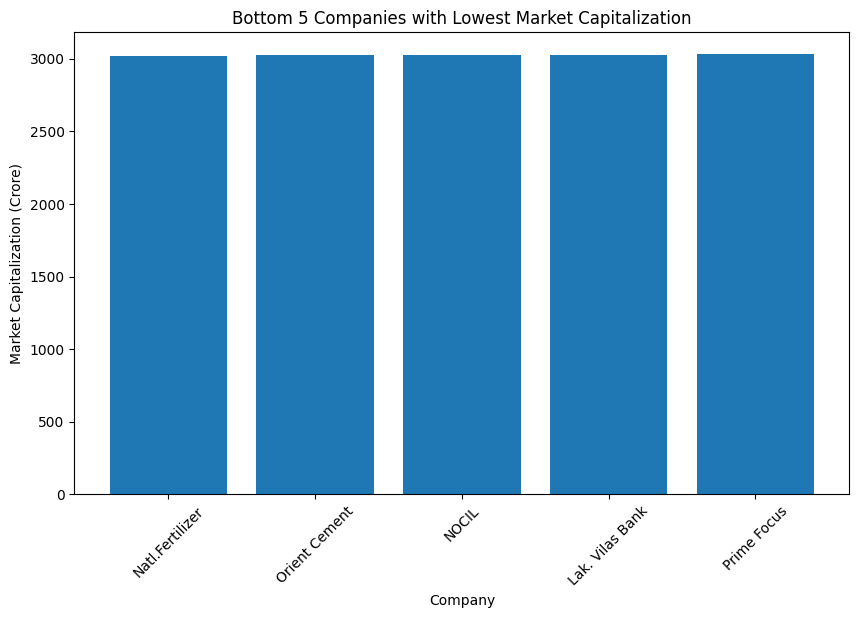

In [45]:
# Sort the dataset by market capitalization in ascending order
sorted_data = df.sort_values('Mar Cap - Crore')

# Select the bottom 5 companies with the lowest market capitalization
bottom_5_companies = sorted_data.head(5)


print(bottom_5_companies.value_counts())



# Plot the market capitalization of the bottom 5 companies
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_companies['Name'], bottom_5_companies['Mar Cap - Crore'])
plt.title('Bottom 5 Companies with Lowest Market Capitalization')
plt.xlabel('Company')
plt.ylabel('Market Capitalization (Crore)')
plt.xticks(rotation=45)
plt.show()

Sales Performance Indicator: Create a binary feature indicating good or poor sales performance based on a threshold.

In [46]:
sales_threshold = df['Sales Qtr - Crore'].mean()
df['Sales_Performance'] = df['Sales Qtr - Crore'].apply(lambda x: 'Good' if x > sales_threshold else 'Poor')

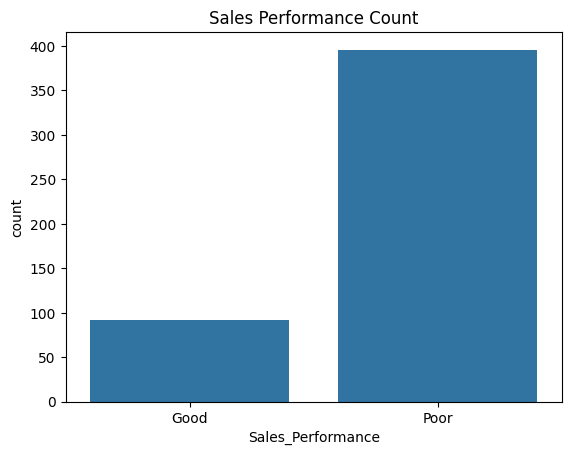

In [47]:
sns.countplot(x='Sales_Performance', data=df)
plt.title('Sales Performance Count')
plt.show()

In [65]:
# Key metrics for Market Capitalization
mean_market_cap = df['Mar Cap - Crore'].mean()
median_market_cap = df['Mar Cap - Crore'].median()
total_market_cap = df['Mar Cap - Crore'].sum()

print(f"Mean Market Capitalization: {mean_market_cap:.2f} Crores")
print(f"Median Market Capitalization: {median_market_cap:.2f} Crores")
print(f"Total Market Capitalization: {total_market_cap:.2f} Crores")

Mean Market Capitalization: 28043.86 Crores
Median Market Capitalization: 10380.42 Crores
Total Market Capitalization: 13685402.27 Crores


In [66]:
# Key metrics for Quarterly Sales
mean_sales_qtr = df['Sales Qtr - Crore'].mean()
median_sales_qtr = df['Sales Qtr - Crore'].median()
total_sales_qtr = df['Sales Qtr - Crore'].sum()

print(f"Mean Quarterly Sales: {mean_sales_qtr:.2f} Crores")
print(f"Median Quarterly Sales: {median_sales_qtr:.2f} Crores")
print(f"Total Quarterly Sales: {total_sales_qtr:.2f} Crores")

Mean Quarterly Sales: 3807.79 Crores
Median Quarterly Sales: 1276.26 Crores
Total Quarterly Sales: 1858201.23 Crores


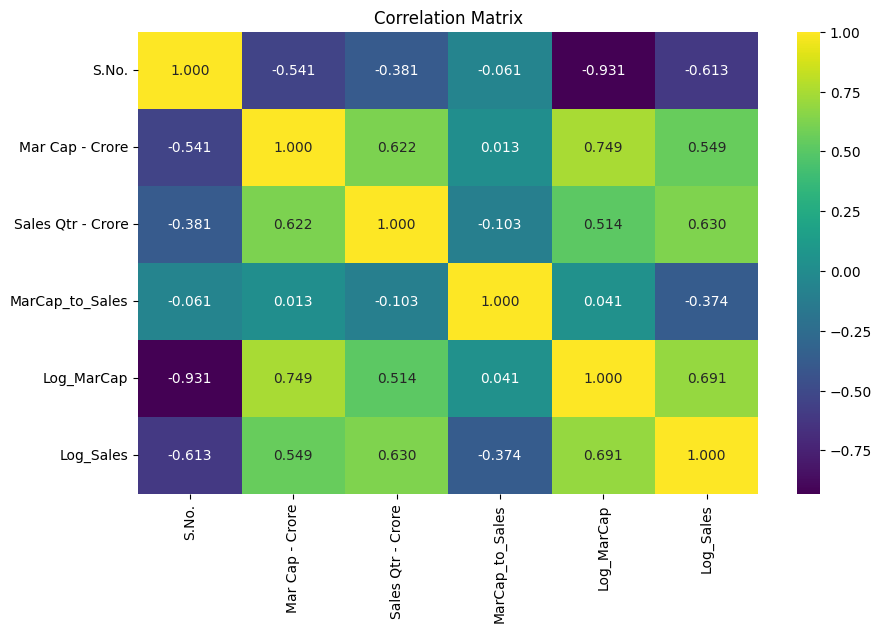

In [69]:
def correlation_analysis(df):
    numeric_df = df.select_dtypes(include=[np.number])
    corr = numeric_df.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='viridis', fmt='.3f')
    plt.title('Correlation Matrix')
    plt.show()
correlation_analysis(df)